In [1]:
import pandas as pd
import numpy as np

In [2]:
class Ridge_Regression():
    def __init__(self,lr,n_iter,alpha):
        self.lr = lr
        self.n_iter = n_iter
        self.alpha = alpha
        
    def fit(self,X,y):
        
        self.m,self.n = X.shape
        
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y
        
        for i in range(self.n_iter):
            self.update_weight()
        
    def update_weight(self):
        
        y_pred = self.predict(self.X)
        
        dw = (-(2* (self.X.T).dot(self.y-y_pred)) + 2*(self.alpha * self.w)) / self.m
        db = -2 * np.sum(self.y - y_pred) / self.m
        
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db
        
    def predict(self,X):
        
        return X.dot(self.w) + self.b

In [3]:
df = pd.read_csv('/Users/raihan/Brototype/Dataset/ML/salary_data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [8]:
X_train

array([[ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [9]:
model = Ridge_Regression(lr =0.001,n_iter=1000,alpha=0 ) 

In [10]:
model.fit(X_train,y_train)

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_pred

array([ 28536.65739792, 134835.82734807,  59943.23033774,  57527.3401116 ,
       125172.26644352, 115508.70553896, 126380.21155659,  58735.28522467])

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Salary')

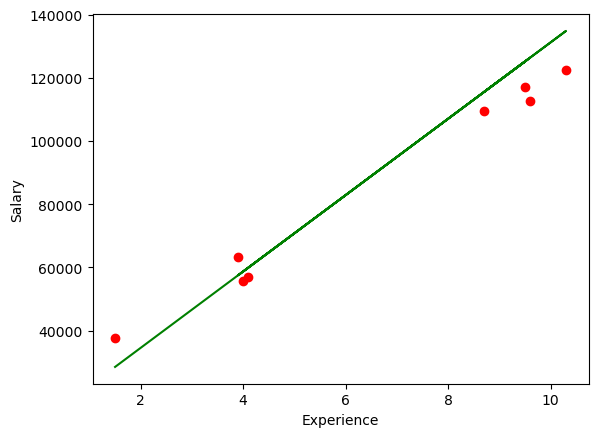

In [14]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,y_pred,color = 'green')
plt.xlabel("Experience")
plt.ylabel('Salary')